<a href="https://colab.research.google.com/github/vhac58/ViruelaSimica/blob/main/Analisis_ViruelaSimica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto final de Analisis y Visualización de Datos** - Bootcamp AVDH2 217

Presentado a los ingenieros Jesus Rubio y Jaime Avila, docentes

Realizado por Victor Hugo Alvarez Castaño, campista

Bogota DC, noviembre de 2024

Este proyecto tiene como objetivo poner en practica los conocimientos, conceptos, metodos y lineamientos para el analisis y visualización de datos, así como el uso de las diferentes herramientas informaticas provistas e ilustradas por los docentes durante el desarrollo del bootcamp.

Para el ejercicio seleccione un conjunto de datos relacionados con la enfermedad llamada Viruela Símica (viruela del mono o MonkeyPox), publicado por el Instituto Nacional de Salud de Colombia en el portal de Datos Abiertos (Datos.gov.co)

Los pasos a seguir fueron:

1.	Alistamiento de la Información.
Se trabajó con la URL -> https://www.datos.gov.co/, desde la cual se descargó el conjunto de datos “Casos positivos de Viruela símica en Colombia” con catálogo de variables en: http://url.ins.gov.co/catalogo-variables-viruela-simica. Desde el sitio de www.ins.gov.co se descargaron tambien el protocolo de vigilancia de la enfermedad y la ficha epidemiológica con la cual se recopilan los datos.
Desde el sitio de www.datos.gov.co se descargó el software Open Refine para la limpieza de datos.

2.	Procesamiento de la Información. Usando Python y Google Colab. Revisado el conjunto de datos y documentos relacionados, se plantearon las siguientes preguntas:
¿Que distribución tienen los casos de viruela por edad, sexo, geografía, etnia, fuente de infección y condición final?.
¿Cual es la tendencia temporal y que nos muestran los intervalos de tiempos transcurridos entre las fechas de aparición de síntomas, exantema, diagnóstico, notificación, y fecha de cierre del seguimiento de cada caso?.

3.	Presentación de la Información. Almacenamiento del proyecto en la plataforma de Github para tener disponibilidad y acceso a los documentos ahi almacenados. Además me permite usar la interfaz de Colab para ejecutar los comandos de python y enviar cambios al repositorio de GitHub.


El conjunto de datos tienen 4.269 filas o registros que corresponden a los casos de personas afectadas por viruela símica y 24 columnas que describen caracteristicas de persona, lugar y tiempo, entre otras variables.


Con la opción FACETAS /Filtros de Open Refine se llevó a cabo la revisión y depuración de cada una de las variables del conjunto de datos, explorando los valores de los datos, su formato y necesidades de limpieza.

En esta primera faceta se muestra las 52 opciones que corresponden a la cantidad de semanas epidemiológicas de acuerdo con el calendario estándar adoptado para el reporte semanal.

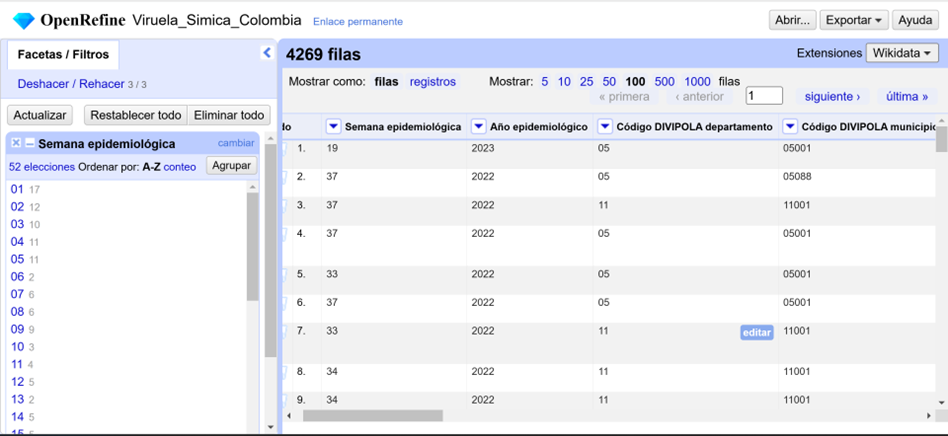

La variable año epidemiológico muestra que la mayoría de casos ocurrieron en 2022, lo cual corresponde al 95.1% de los casos.

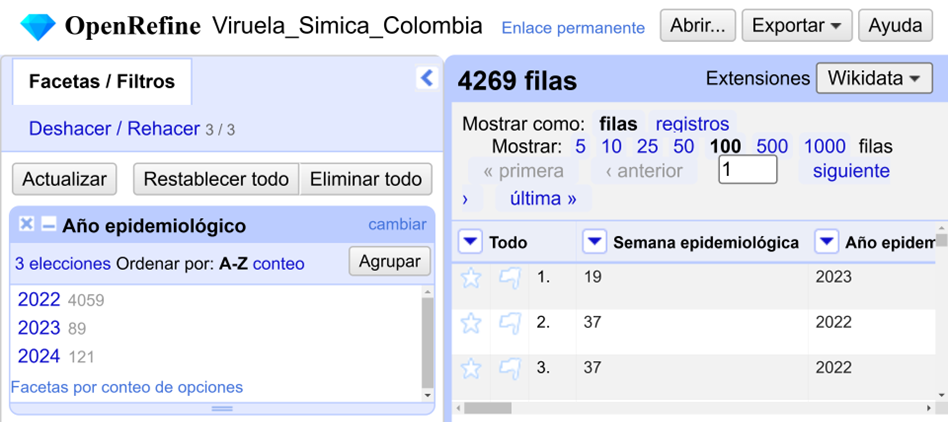


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_viruela=pd.read_csv('https://raw.githubusercontent.com/vhac58/ViruelaSimica/refs/heads/main/Viruela_Simica_Colombia_limpio.csv')

In [ ]:
df_viruela

,Semana epidemiologica,Ano epidemiologico,Codigo DIVIPOLA departamento,Codigo DIVIPOLA municipio,Departamento,Municipio,Fecha notificacion,Fecha diagnostico,Sexo,Edad,...,Hospitalizacion,Condicion final,Vi­nculo epidemiologico,¿Viajo?,Pai­s de viaje,Fuente de infeccion,Fecha de terminacion del seguimiento,Pertenencia etnica,Tipo de seguridad social,Estrato
0,19,2023,5,5001,ANTIOQUIA,MEDELLIN,2023-05-11,2023-06-13,M,37,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2023-05-31,6,C,3
1,37,2022,5,5088,ANTIOQUIA,BELLO,2022-09-19,2022-09-20,M,18,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-10-06,6,C,2
2,37,2022,11,11001,BOGOTA,BOGOTA,2022-09-21,2022-09-21,M,30,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-10-04,6,C,2
3,37,2022,5,5001,ANTIOQUIA,MEDELLIN,2022-09-19,2022-09-21,M,37,...,2,1,2,2,NaN,RELACIONADO CON FUENTE DESCONOCIDA,2022-10-08,6,S,3
4,33,2022,5,5001,ANTIOQUIA,MEDELLIN,2022-09-02,2022-09-05,M,26,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-09-10,6,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,29,2024,8,8001,ATLANTICO,BARRANQUILLA,2024-07-24,2024-07-26,M,28,...,2,1,2,2,NaN,EN ESTUDIO,2024-08-06,6,C,3
4265,35,2024,8,8001,ATLANTICO,BARRANQUILLA,2024-08-31,2024-09-04,M,31,...,2,1,2,2,NaN,EN ESTUDIO,2024-09-15,6,S,2
4266,34,2024,11,1,BOGOTA,BOGOTA,2024-09-02,2024-09-03,M,43,...,2,1,2,2,NaN,EN ESTUDIO,2024-09-10,6,C,3
4267,35,2024,1,724,BARCELONA,BARCELONA,2024-09-03,2024-09-05,M,35,...,2,1,2,1,724.0,EN ESTUDIO,2024-09-19,6,C,3


In [ ]:
type(df_viruela)

pandas.core.frame.DataFrame

In [ ]:
df_viruela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Semana epidemiologica                 4269 non-null   int64  
 1   Ano epidemiologico                    4269 non-null   int64  
 2   Codigo DIVIPOLA departamento          4269 non-null   int64  
 3   Codigo DIVIPOLA municipio             4269 non-null   int64  
 4   Departamento                          4269 non-null   object 
 5   Municipio                             4269 non-null   object 
 6   Fecha notificacion                    4269 non-null   object 
 7   Fecha diagnostico                     4269 non-null   object 
 8   Sexo                                  4269 non-null   object 
 9   Edad                                  4269 non-null   int64  
 10  Unidad de medida                      4269 non-null   int64  
 11  Fecha de inicio d

In [ ]:
df_viruela.describe()

,Semana epidemiologica,Ano epidemiologico,Codigo DIVIPOLA departamento,Codigo DIVIPOLA municipio,Edad,Unidad de medida,Hospitalizacion,Condicion final,Vi­nculo epidemiologico,¿Viajo?,Pai­s de viaje,Pertenencia etnica,Estrato
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,153.000000,4269.000000,4269.000000
mean,36.370813,2022.077536,20.010541,19973.570625,32.290700,1.000234,1.991567,1.008199,1.992036,1.964160,548.274510,5.977747,133.842352
std,6.629292,0.358109,23.927856,23911.660422,8.379168,0.015305,0.091453,0.090185,0.088898,0.185912,264.127766,0.253784,336.902753
min,1.000000,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,1.000000
25%,34.000000,2022.000000,5.000000,5088.000000,27.000000,1.000000,2.000000,1.000000,2.000000,2.000000,276.000000,6.000000,2.000000
50%,36.000000,2022.000000,11.000000,11001.000000,31.000000,1.000000,2.000000,1.000000,2.000000,2.000000,591.000000,6.000000,3.000000
75%,39.000000,2022.000000,11.000000,11001.000000,37.000000,1.000000,2.000000,1.000000,2.000000,2.000000,826.000000,6.000000,4.000000
max,52.000000,2024.000000,95.000000,95001.000000,81.000000,2.000000,2.000000,2.000000,2.000000,2.000000,862.000000,6.000000,999.000000


El conjunto de datos no presenta valores nulos por la depuración previa durante la limpieza de datos con Open Refine.
La edad promedio de las personas reportadas es de 32.3 años. El 50% de las personas reportadas estan en la franja entre 27 y 37 años indicando la alta frecuencia de viruela símica en personas adultas jovenes.

In [ ]:
df_viruela.describe(include=[object])

,Departamento,Municipio,Fecha notificacion,Fecha diagnostico,Sexo,Fecha de inicio de si­ntomas,Fecha de exantema,Fuente de infeccion,Fecha de terminacion del seguimiento,Tipo de seguridad social
count,4269,4269,4269,4269,4269,4269,4269,4269,4269,4269
unique,28,131,321,313,2,324,326,5,323,6
top,BOGOTA,BOGOTA,2022-09-12,2022-09-19,M,2022-08-29,2022-08-20,FUENTE DESCONOCIDA,2022-09-19,C
freq,2032,2032,102,98,4131,78,75,3315,78,3317


In [ ]:
df_viruela.head()

,Semana epidemiologica,Ano epidemiologico,Codigo DIVIPOLA departamento,Codigo DIVIPOLA municipio,Departamento,Municipio,Fecha notificacion,Fecha diagnostico,Sexo,Edad,...,Hospitalizacion,Condicion final,Vi­nculo epidemiologico,¿Viajo?,Pai­s de viaje,Fuente de infeccion,Fecha de terminacion del seguimiento,Pertenencia etnica,Tipo de seguridad social,Estrato
0,19,2023,5,5001,ANTIOQUIA,MEDELLIN,2023-05-11,2023-06-13,M,37,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2023-05-31,6,C,3
1,37,2022,5,5088,ANTIOQUIA,BELLO,2022-09-19,2022-09-20,M,18,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-10-06,6,C,2
2,37,2022,11,11001,BOGOTA,BOGOTA,2022-09-21,2022-09-21,M,30,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-10-04,6,C,2
3,37,2022,5,5001,ANTIOQUIA,MEDELLIN,2022-09-19,2022-09-21,M,37,...,2,1,2,2,NaN,RELACIONADO CON FUENTE DESCONOCIDA,2022-10-08,6,S,3
4,33,2022,5,5001,ANTIOQUIA,MEDELLIN,2022-09-02,2022-09-05,M,26,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-09-10,6,S,4


In [ ]:
df_viruela["Fuente de infeccion"].unique()

array(['FUENTE DESCONOCIDA', 'RELACIONADO CON FUENTE DESCONOCIDA',
       'RELACIONADO CON LA IMPORTACION', 'IMPORTADO', 'EN ESTUDIO'],
      dtype=object)

In [ ]:
df_viruela["Sexo"].value_counts()

,count
Sexo,
M,4131
F,138


In [ ]:
df_viruela["Sexo"].value_counts("%")

,proportion
Sexo,
M,0.967674
F,0.032326


Solo un 3% de las personas reportadas con viruela simica son mujeres. Que factor de exposición hace que la mayoría de pacientes sean hombres? En este conjunto de datos sería ideal tener muchos mas atributos de las personas afectadas, tales como ocupación.

In [ ]:
df_viruela["Departamento"].value_counts("%")

,proportion
Departamento,
BOGOTA,0.475990
ANTIOQUIA,0.283907
VALLE,0.100023
ATLANTICO,0.025299
CUNDINAMARCA,0.022956
SANTANDER,0.018974
RISARALDA,0.015226
TOLIMA,0.014055
META,0.007027


In [ ]:
df_viruela.groupby("Departamento").count()

,Semana epidemiologica,Ano epidemiologico,Codigo DIVIPOLA departamento,Codigo DIVIPOLA municipio,Municipio,Fecha notificacion,Fecha diagnostico,Sexo,Edad,Unidad de medida,...,Hospitalizacion,Condicion final,Vi­nculo epidemiologico,¿Viajo?,Pai­s de viaje,Fuente de infeccion,Fecha de terminacion del seguimiento,Pertenencia etnica,Tipo de seguridad social,Estrato
Departamento,,,,,,,,,,,,,,,,,,,,,
ANTIOQUIA,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,...,1212,1212,1212,1212,38,1212,1212,1212,1212,1212
ATLANTICO,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,3,108,108,108,108,108
BARCELONA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BOGOTA,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032,...,2032,2032,2032,2032,82,2032,2032,2032,2032,2032
BOLIVAR,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,2,26,26,26,26,26
BOYACA,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,0,9,9,9,9,9
CALDAS,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,4,23,23,23,23,23
CAQUETA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CASANARE,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,0,3,3,3,3,3


In [ ]:
df_viruela.groupby("Sexo").agg({"Edad":"mean"})

,Edad
Sexo,
F,31.289855
M,32.324135


In [ ]:
pd.crosstab(df_viruela.Departamento, df_viruela.Sexo)

Sexo,F,M
Departamento,,
ANTIOQUIA,49,1163
ATLANTICO,2,106
BARCELONA,0,1
BOGOTA,46,1986
BOLIVAR,1,25
BOYACA,1,8
CALDAS,1,22
CAQUETA,0,1
CASANARE,0,3


In [ ]:
pd.crosstab(df_viruela['Condicion final'], df_viruela['Fuente de infeccion'])

Fuente de infeccion,EN ESTUDIO,FUENTE DESCONOCIDA,IMPORTADO,RELACIONADO CON FUENTE DESCONOCIDA,RELACIONADO CON LA IMPORTACION
Condicion final,,,,,
1,167,3285,69,626,87
2,0,30,1,4,0


Según la Fuente de infección, los casos se clasifican así:
(i) Caso importado. Caso confirmado en una persona con antecedente de viaje a otro país donde circula el virus, durante el período de posible exposición (5 a 21 días antes del inicio del pródromo).
(ii) Relacionado con la importación. Caso confirmado que, según las pruebas epidemiológicas y virológicas, estuvo expuesto localmente al virus y forma parte de una cadena de transmisión originada por un caso importado.
(iii) Fuente desconocida. Caso confirmado al cual no se le pueden identificar cadenas de transmisión o fuente de infección.
(iv) Relacionado con fuente desconocida. Caso confirmado que hace parte de una cadena de transmisión secundaria o un caso confirmado de fuente desconocida.

La mayoría de los casos en Colombia son de fuente desconocida y sus contactos relacionados, equivalentes a un total de 3.945 casos (92,4%).

In [ ]:
# prompt: series de tiempo

# Convert the 'Fecha diagnostico' column to datetime objects.
df_viruela['Fecha diagnostico'] = pd.to_datetime(df_viruela['Fecha diagnostico'])

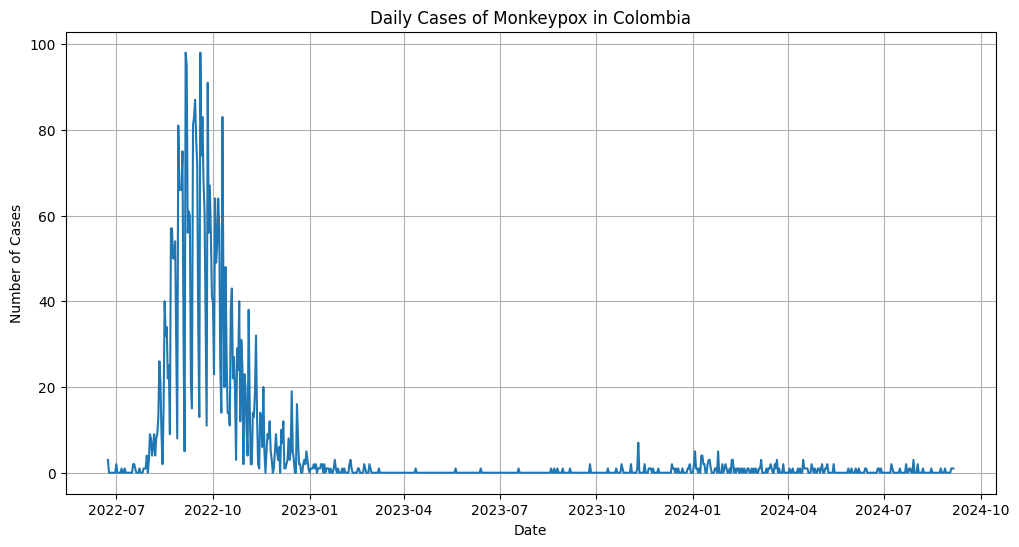

In [ ]:
# prompt: serie de tiempo

# Assuming 'Fecha diagnostico' is already converted to datetime objects as in the previous code.

# Set 'Fecha diagnostico' as the index
df_viruela = df_viruela.set_index('Fecha diagnostico')

# Resample the data to a daily frequency and count the number of cases
daily_cases = df_viruela.resample('D').size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_cases.index, daily_cases.values)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily Cases of Monkeypox in Colombia')
plt.grid(True)
plt.show()

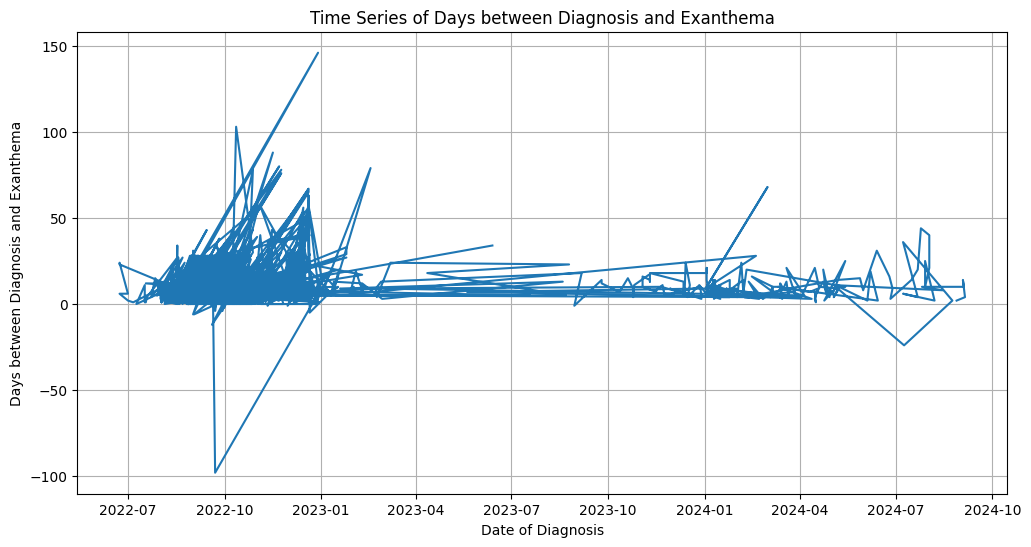

In [ ]:
# prompt: serie de tiempo con intervalo de tiempo entre fecha diagnostico y fecha exantema
df_viruela = df_viruela.reset_index()
# Convert 'Fecha de exantema' to datetime objects.
df_viruela['Fecha de exantema'] = pd.to_datetime(df_viruela['Fecha de exantema'])

# Calculate the time difference between 'Fecha diagnostico' and 'Fecha de exantema'
df_viruela['Time Difference'] = df_viruela['Fecha diagnostico'] - df_viruela['Fecha de exantema']

# Convert the time difference to days
df_viruela['Time Difference'] = df_viruela['Time Difference'].dt.days

# Create the time series with the calculated time difference
time_series = df_viruela.set_index('Fecha diagnostico')['Time Difference']

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values)
plt.xlabel('Date of Diagnosis')
plt.ylabel('Days between Diagnosis and Exanthema')
plt.title('Time Series of Days between Diagnosis and Exanthema')
plt.grid(True)
plt.show()